## Class Predictions with Keras ##
Simple 2D data-set example

The `predict_classes()` function that is used that can only be used with `Sequential` models.

this example taken from https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

In [89]:
#pip install keras
#pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [90]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
#n_features = 2, so y can be 1 or 0

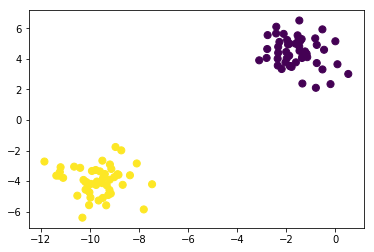

In [91]:
import matplotlib.pyplot as plt
plt.scatter( X[:, 0], X[:, 1], s = 50, c = y);
plt.show()

In [92]:
#Scale the data
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

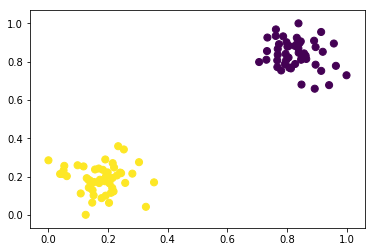

In [93]:
plt.scatter( X[:, 0], X[:, 1], s = 50, c = y);
plt.show()

#### Train a Model ####


https://keras.io/getting-started/sequential-model-guide/

https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02


In [94]:
# define the model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  #work with 2D data, activation type "Rectified Linear Unit"
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))     #sigmoid "squashes the output into a (0,1) interval and it’s non linear"
model.compile(loss='binary_crossentropy', optimizer='adam')
# Fit the model
hist = model.fit(X, y, epochs=400, verbose=0)  #200 epoc iterations

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


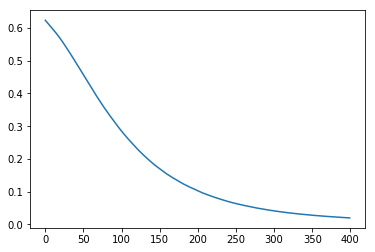

In [96]:
plt.plot(hist.history['loss'])
plt.show()


For ** Saving a Model **   

see this blog: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

#### Use the Model to Make Predictions ####

In [97]:
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scalar.transform(Xnew)

We now have an array of 3 x 2D items to classify.

In [98]:
Xnew

array([[0.89337759, 0.65864154],
       [0.29097707, 0.12978982],
       [0.78082614, 0.75391697]])

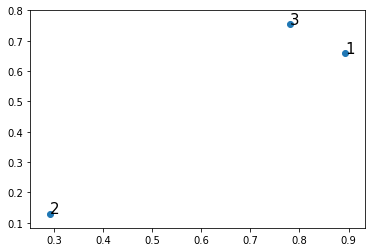

In [116]:
# create a list 1 .. 3 to annotate the dots
XnewItems = ["1","2","3"]
xList = Xnew[:,0]
yList = Xnew[:,1]

#plot
plt.scatter(Xnew[:, 0], Xnew[:,1])
for i, txt in enumerate(XnewItems):
    plt.annotate(txt, (xList[i], yList[i]), fontsize = 15)

In [117]:
# make a prediction
ynew = model.predict_classes(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[0.89337759 0.65864154], Predicted=[0]
X=[0.29097707 0.12978982], Predicted=[1]
X=[0.78082614 0.75391697], Predicted=[0]


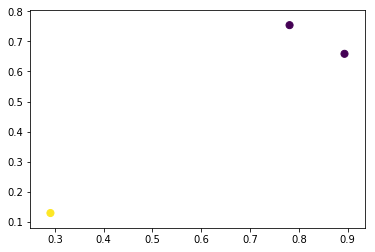

In [119]:
plt.scatter( Xnew[:, 0], Xnew[:, 1], s = 50, c = ynew.flatten());
plt.show()

In [120]:
tst = Xnew[1].reshape(1,2)
model.predict_classes(tst)

array([[1]])